# PHYS 225
## Intro to Computational Physics
### 11-01-2019

## Outline
* Final Project Proposal Phase 3
* Learning to use the Scipy Library
* Keeping your final project work in a Jupyter Notebook.

## Final Project Phase 3
Before submitting, make sure you can answer these questions.
1. Do I have a clear sense of my overall project goal?
1. Do I have a clear plan for what subgoals will be completed next week?
1. Does each lab partner have a clear focus and responsibility so you are equally engaged on complementary pieces of the project?


## Notes on Using JupyterHub for the final Project
1. I have created a `Final_Project` assignment where you should save all your work (for now)
1. I'm working with ITS to create shared directories on the JupyterHub for each team. 
    * Goal is to accomplish shared directories by 11/8. 
    * For now use Google Drive to share files
1. **Each lab partner should keep their own Jupyter Notebook** which shows the stuff they are leading in the collaboration. Sometimes you may share content, which is fine, especially when integrating two pieces of the project. 

## Learning to use the Scipy Library

### Example 1: Integration
Documentation for [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html).

1. Integrate a function.
1. Integrate a data set.


In [54]:
import numpy as np
import matplotlib.pyplot as plt

### Goal: Do this integral
$$\int_{-1}^{1}\sqrt{1-x^2}dx$$
### Which integration function in `scipy.optimize` should I pick?

In [55]:
from scipy.integrate import quad

In [56]:
# define the function that represents the top half of the circle
def f(x) :
    return (1-x**2)**0.5

In [57]:
# call the quad() function
integral_of_f = quad(f,-1,1)
print(integral_of_f)

(1.5707963267948983, 1.0002354500215915e-09)


#### What are the two values that are returned? 
Examine the documentation.

In [59]:
print(integral_of_f)

(1.5707963267948983, 1.0002354500215915e-09)


#### How close to $\pi/2$ is the result?

In [11]:
integral_of_f[0] - np.pi/2

1.7763568394002505e-15

### Let's copy the example from the documentation for `quad`

### New technique: lambda functions

Look at this [webpage on lambda functions](https://www.afternerd.com/blog/python-lambdas/) for more details.

* Lambda functions are "anonymous" in the sense they can be defined without giving them a name.
* They can be used a inputs to another function. 

In [12]:
# create a lambda function that squares the input, name it "square"
square = lambda x : x**2

In [14]:
# call the square() function

9

### Use a double integral to get area of circle

**Get out a piece of paper and write out a double integral to calculate the area of a circle using**
1. Rectangular coordinates
1. Polar coordinates

### What  `scipy.integrate` function should be used to do the double integral?

### Start with example from documentation on `dblquad()`

In [60]:
# Start with example copied from documentation on dblquad
from scipy import integrate
f = lambda y, x: x*y**2
integrate.dblquad(f, 0, 2, lambda x: 0, lambda x: 1)

(0.6666666666666667, 7.401486830834377e-15)

### Area of circle in rectangular coordinates
$$ \int_{-1}^1 \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} dy dx $$

In [21]:
# set up the functions for f(y,x), upper limit and lower limit
f = lambda y, x: 1
lowerlimit = lambda x: -(1-x**2)**0.5
upperlimit = lambda x: (1-x**2)**0.5
integral = integrate.dblquad(f, -1, 1, lowerlimit, upperlimit)
print(integral)

(3.1415926535897967, 2.000470900043183e-09)


In [22]:
# how different is the integral from \pi = 3.14... ?
integral[0] - np.pi

3.552713678800501e-15

### Polar coordinates
$$ \int_{0}^{2\pi}\int_{0}^1 r dr d\theta$$

In [61]:
# set up the functions for f(y,x), upper limit and lower limit
f = lambda theta, r: r
lowerlimit = lambda x: 0
upperlimit = lambda x: 2*np.pi
integral = integrate.dblquad(f, 0, 1, lowerlimit, upperlimit)
print(integral)

(3.141592653589793, 6.960589751742992e-14)


In [62]:
# how different is the integral from \pi = 3.14... ?
integral[0] - np.pi

0.0

### Can you integrate a data set?
Example: Given data set $a(t)$ calculate integral to get $v(t)$

**Which `scipy.integrate` function should you use?**

In [24]:
# load the data
data = np.loadtxt("my_acceleration_data.csv", delimiter=",", skiprows = 1)
data

array([[ 0.00000000e+00, -7.58529663e-01,  5.33599854e-01,
         8.59741211e+00,  8.64728807e+00],
       [ 2.31933600e-03, -8.11172485e-01,  5.52749634e-01,
         9.07357788e+00,  9.12651897e+00],
       [ 4.66919000e-03, -8.51852417e-01,  5.81451416e-01,
         9.25782776e+00,  9.31510135e+00],
       ...,
       [ 9.07938784e+01, -6.74774170e-01,  2.39562988e-03,
         9.65982056e+00,  9.68335991e+00],
       [ 9.07961977e+01, -6.96304321e-01, -9.56726074e-03,
         9.66940308e+00,  9.69444620e+00],
       [ 9.07985476e+01, -6.91528320e-01, -7.17163086e-03,
         9.66221619e+00,  9.68693370e+00]])

In [25]:
# extract time and pressure arrays
t = data[:,0]  # time in seconds
az = data[:,3]  # acceleration in m/s

Text(0.5, 0, 'time (s)')

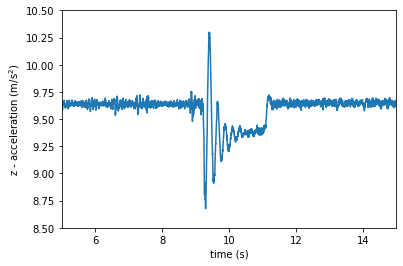

In [37]:
# create the plot of acceleration vs time
plt.plot(t,az)
plt.xlim(5,15)
plt.ylim(8.5,10.5)
plt.ylabel("z - acceleration (m/s$^2$)")
plt.xlabel("time (s)")

Text(0.5, 1.0, 'Elevator starts to move downward')

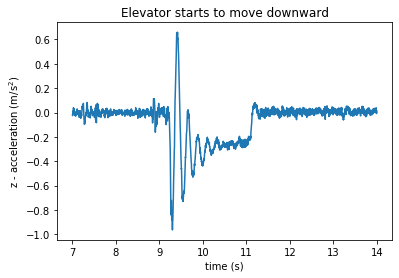

In [63]:
# restrict the time range to when elevator starts moving downward
condition = np.logical_and(t < 14, t > 7)
az_zeroed = az - 9.64
plt.plot(t[condition],az_zeroed[condition])

plt.ylabel("z - acceleration (m/s$^2$)")
plt.xlabel("time (s)")
plt.title("Elevator starts to move downward")

### Do the numerical integration using `cumtrapz()` within `scipy.integrate`

In [49]:
# find the velocity
vz = integrate.cumtrapz(y=az_zeroed[condition], x=t[condition])

Text(0.5, 1.0, 'Elevator starts to move downward')

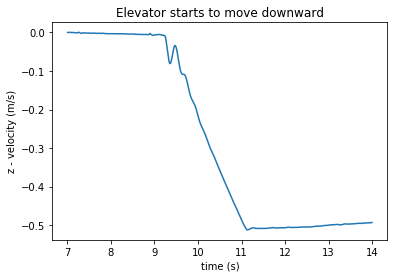

In [52]:
# plot the velocity
plt.plot(t[condition][1:],vz)

plt.ylabel("z - velocity (m/s)")
plt.xlabel("time (s)")
plt.title("Elevator starts to move downward")